##Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/winequality-red.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Text(0, 0.5, 'alcohol')

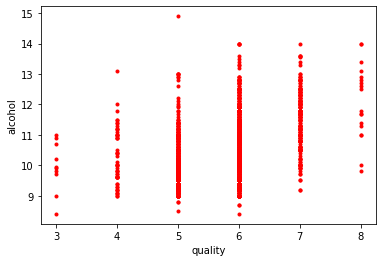

In [6]:
plt.plot(data['quality'],data['alcohol'],'r.')
plt.xlabel('quality')
plt.ylabel('alcohol')

##Sepearte Features and Target

In [8]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

##Splitting of Data into Train and Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

##Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
dtrain = y_train.reshape(len(y_train), 1)
dtest = y_test.reshape(len(y_test),1)

In [13]:
x_sc = StandardScaler()
y_sc = StandardScaler()

In [14]:
xd_train = x_sc.fit_transform(x_train)
yd_train = y_sc.fit_transform(dtrain)

In [15]:
xd_test = x_sc.transform(x_test)
yd_test = y_sc.transform(dtest)

In [16]:
xd_train

array([[ 0.39176654, -0.81114546,  0.71412534, ..., -1.17270905,
        -0.46007902,  1.34183169],
       [-0.46848768,  0.58253407, -0.78540042, ..., -0.326157  ,
         0.65405953, -0.96321939],
       [-0.86993965,  0.58253407, -1.04393934, ...,  1.04135016,
        -0.63599564, -0.04119896],
       ...,
       [ 0.39176654, -0.25367365,  0.24875528, ...,  0.06455933,
        -0.22552354, -0.96321939],
       [-0.92728993, -0.36516801, -0.164907  , ...,  0.52039505,
        -0.34280128,  0.14320513],
       [-0.35378711,  0.41529253, -1.09564713, ...,  0.52039505,
        -0.22552354, -0.31780509]])

In [17]:
yd_train

array([[ 1.68385432],
       [-0.79588048],
       [ 0.44398692],
       ...,
       [-0.79588048],
       [ 0.44398692],
       [ 0.44398692]])

##Train on Different Algorithms

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [19]:
r_reg = RandomForestRegressor()
l_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
s_reg = SVR()
p_reg = LinearRegression()

In [20]:
x_poly = PolynomialFeatures(degree=5)
x_poly = x_poly.fit_transform(xd_train)

In [22]:
temp = PolynomialFeatures(degree=5)
temp = temp.fit_transform(xd_test)

In [23]:
r_reg.fit(xd_train, yd_train)
l_reg.fit(xd_train, yd_train)
d_reg.fit(xd_train, yd_train)
s_reg.fit(xd_train, yd_train)
p_reg.fit(x_poly, yd_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
r_pred = r_reg.predict(xd_test)
l_pred = l_reg.predict(xd_test) 
d_pred = d_reg.predict(xd_test) 
s_pred = s_reg.predict(xd_test) 
p_pred = p_reg.predict(temp)

##Result

In [25]:
from sklearn.metrics import r2_score

In [26]:
r = r2_score(yd_test, r_pred)
l = r2_score(yd_test, l_pred)
d = r2_score(yd_test, d_pred)
s = r2_score(yd_test, s_pred)
p = r2_score(yd_test, p_pred)

In [27]:
print('r: ' + str(r) + '\n'  'l: ' + str(l) + '\n' 'd: ' + str(d) + '\n' 's: ' + str(s) + '\n' 'p: ' + str(p) + '\n'   )

r: 0.4694122410097641
l: 0.3417545160804304
d: -0.10978804477256499
s: 0.3593634119266427
p: -812201.0808893124



In [28]:
print(r, l, d, s, p)

0.4694122410097641 0.3417545160804304 -0.10978804477256499 0.3593634119266427 -812201.0808893124


In [29]:
condition = [(data['quality']>5.5), (data['quality']<5.5)]
gb = ['good', 'bad']
data['review'] = np.select(condition, gb)

In [30]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


##Graph Comparision

In [31]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'fixed acidity')

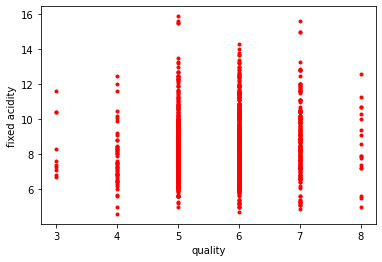

In [37]:
plt.plot(data['quality'], data['fixed acidity'], 'r.')
plt.xlabel('quality')
plt.ylabel('fixed acidity')

Text(0, 0.5, 'volatile acidity')

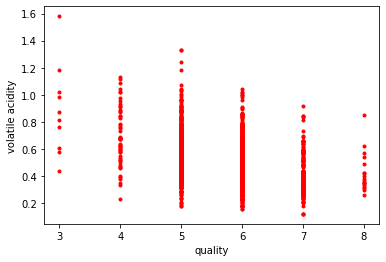

In [38]:
plt.plot(data['quality'], data['volatile acidity'], 'r.')
plt.xlabel('quality')
plt.ylabel('volatile acidity')

Text(0, 0.5, 'citric acid')

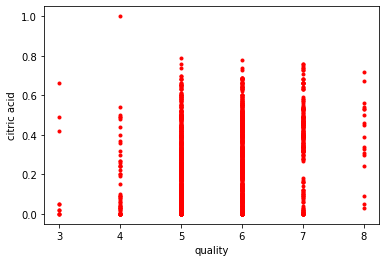

In [39]:
plt.plot(data['quality'], data['citric acid'], 'r.')
plt.xlabel('quality')
plt.ylabel('citric acid')

Text(0, 0.5, 'residual sugar')

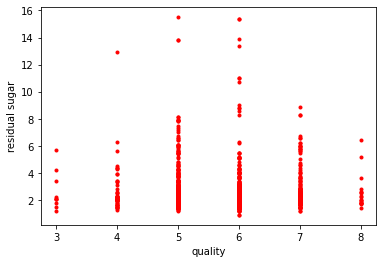

In [40]:
plt.plot(data['quality'], data['residual sugar'], 'r.')
plt.xlabel('quality')
plt.ylabel('residual sugar')

Text(0, 0.5, 'chlorides')

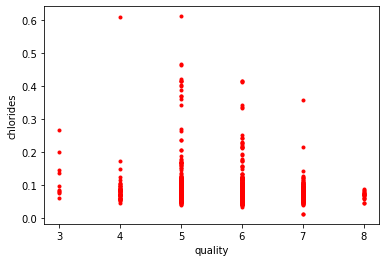

In [41]:
plt.plot(data['quality'], data['chlorides'], 'r.')
plt.xlabel('quality')
plt.ylabel('chlorides')

Text(0, 0.5, 'free sulfur dioxide')

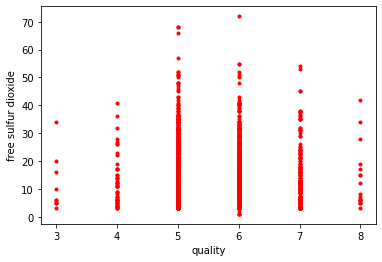

In [42]:
plt.plot(data['quality'], data['free sulfur dioxide'], 'r.')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')

Text(0, 0.5, 'total sulfur dioxide')

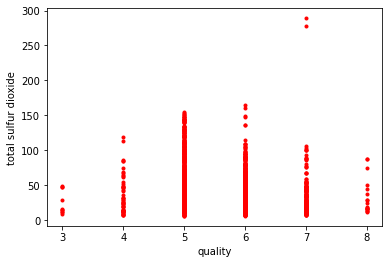

In [45]:
plt.plot(data['quality'], data['total sulfur dioxide'], 'r.')
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')

Text(0, 0.5, 'density')

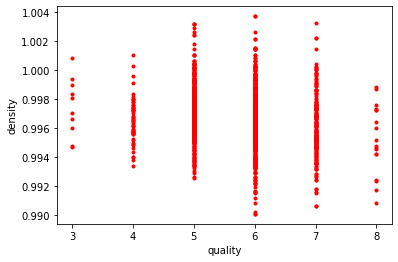

In [46]:
plt.plot(data['quality'], data['density'], 'r.')
plt.xlabel('quality')
plt.ylabel('density')

Text(0, 0.5, 'pH')

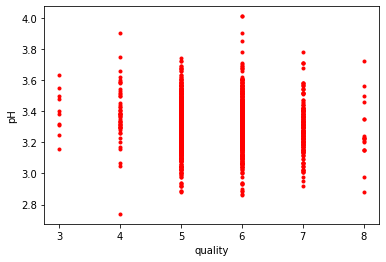

In [47]:
plt.plot(data['quality'], data['pH'], 'r.')
plt.xlabel('quality')
plt.ylabel('pH')

Text(0, 0.5, 'sulphates')

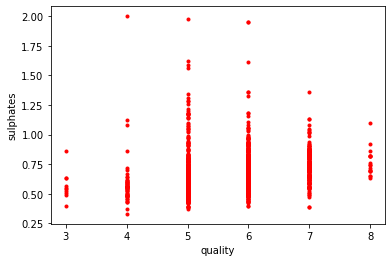

In [48]:
plt.plot(data['quality'], data['sulphates'], 'r.')
plt.xlabel('quality')
plt.ylabel('sulphates')

Text(0, 0.5, 'alcohol')

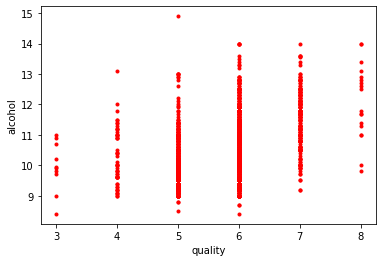

In [49]:
plt.plot(data['quality'], data['alcohol'], 'r.')
plt.xlabel('quality')
plt.ylabel('alcohol')